# Harjeet Singh

In [24]:
import pandas as pd
import numpy as np

In [25]:
bank=pd.read_csv('C:/Users/Administrator/Downloads/bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
bank_dummies = pd.get_dummies(bank.drop('y',axis = 1))# dropped the y
bank_dummies['y'] = bank['y']

In [27]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(bank_dummies,random_state=100,test_size=0.3)
print(train.shape)
print(test.shape)

(31647, 52)
(13564, 52)


In [28]:
train_x=train.drop('y',axis=1)
train_y=train['y']

test_x=test.drop('y',axis=1)
test_y=test['y']


print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(31647, 51)
(31647,)
(13564, 51)
(13564,)


# DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=100,max_depth=3)
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [30]:
pred_test=model.predict(test_x)
pred_results=pd.DataFrame({'actual':test_y,'predicted':pred_test})

In [31]:
#True Positive(TP)
tp_a1=pred_results[(pred_results.predicted=='yes') & (pred_results.actual=='yes')].shape[0]

#True Negative(TN)
tn_a1=pred_results[(pred_results.predicted=='no') & (pred_results.actual=='no')].shape[0]

#False Positive(FP)
fp_a1=pred_results[(pred_results.predicted=='yes') & (pred_results.actual=='no')].shape[0]

#False Negative(FN)
fn_a1=pred_results[(pred_results.predicted=='no') & (pred_results.actual=='yes')].shape[0]


tp_a1,tn_a1,fp_a1,fn_a1

(468, 11722, 263, 1111)

In [32]:
accu_a1=(tn_a1+tp_a1)/(tn_a1+tp_a1+fp_a1+fn_a1)
sensi_a1=tp_a1/(tp_a1+fn_a1)
speci_a1=tn_a1/(tn_a1+fp_a1)

accu_a1,sensi_a1,speci_a1

(0.8987024476555588, 0.2963901203293224, 0.9780559032123488)

In [33]:
print('True Positive :',tp_a1)
print('True Negative :',tn_a1)
print('False Positive :',fp_a1)
print('False Negative :',fn_a1)
print('Accuracy :',accu_a1)
print('Sensitivity :',sensi_a1)
print('Specificity :',speci_a1)

True Positive : 468
True Negative : 11722
False Positive : 263
False Negative : 1111
Accuracy : 0.8987024476555588
Sensitivity : 0.2963901203293224
Specificity : 0.9780559032123488


# RANDOM FOREST

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=100,n_estimators=300)
model_rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [36]:
pred_results_rf = model_rf.predict(test_x)
pred_results_a2 = pd.DataFrame({'actual': test_y,'predicted': pred_results_rf})

In [37]:
#True Positive(TP)
tp_a2=pred_results_a2[(pred_results_a2.predicted=='yes') & (pred_results_a2.actual=='yes')].shape[0]
print(tp_a2)

#True Negative(TN)
tn_a2=pred_results_a2[(pred_results_a2.predicted=='no') & (pred_results_a2.actual=='no')].shape[0]
print(tn_a2)

#False Positive(FP)
fp_a2=pred_results_a2[(pred_results_a2.predicted=='yes') & (pred_results_a2.actual=='no')].shape[0]
print(fp_a2)

#False Negative(FN)
fn_a2=pred_results_a2[(pred_results_a2.predicted=='no') & (pred_results_a2.actual=='yes')].shape[0]
print(fn_a2)

645
11636
349
934


In [38]:
accu_a2=(tn_a2+tp_a2)/(tn_a2+tp_a2+fp_a2+fn_a2)

sensi_a2=tp_a2/(tp_a2+fn_a2)

speci_a2=tn_a2/(tn_a2+fp_a2)
accu_a2,sensi_a2,speci_a2

(0.9054113830728399, 0.4084863837872071, 0.9708802670004172)

In [39]:
print('True Positive :',tp_a2)
print('True Negative :',tn_a2)
print('False Positive :',fp_a2)
print('False Negative :',fn_a2)
print('Accuracy :',accu_a2)
print('Sensitivity :',sensi_a2)
print('Specificity :', speci_a2)

True Positive : 645
True Negative : 11636
False Positive : 349
False Negative : 934
Accuracy : 0.9054113830728399
Sensitivity : 0.4084863837872071
Specificity : 0.9708802670004172


# ADA BOOST

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
model3 = AdaBoostClassifier(random_state=100, n_estimators=800)
model3.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=800, random_state=100)

In [42]:
pred_results3 = model3.predict(test_x)
pred_results_a3 = pd.DataFrame({'actual': test_y,'predicted': pred_results3})

In [43]:
#True Positive(TP)
tp_a3=pred_results_a3[(pred_results_a3.predicted=='yes') & (pred_results_a3.actual=='yes')].shape[0]
print(tp_a3)

#True Negative(TN)
tn_a3=pred_results_a3[(pred_results_a3.predicted=='no') & (pred_results_a3.actual=='no')].shape[0]
print(tn_a3)

#False Positive(FP)
fp_a3=pred_results_a3[(pred_results_a3.predicted=='yes') & (pred_results_a3.actual=='no')].shape[0]
print(fp_a3)

#False Negative(FN)
fn_a3=pred_results_a2[(pred_results_a3.predicted=='no') & (pred_results_a3.actual=='yes')].shape[0]
print(fn_a3)

614
11587
398
965


In [44]:
accu_a3=(tn_a3+tp_a3)/(tn_a3+tp_a3+fp_a3+fn_a3)

sensi_a3=tp_a3/(tp_a3+fn_a3)

speci_a3=tn_a3/(tn_a3+fp_a3)
accu_a3,sensi_a3,speci_a3

(0.8995134178708346, 0.3888537048765041, 0.9667918231122236)

In [45]:
print('True Positive :',tp_a3)
print('True Negative :',tn_a3)
print('False Positive :',fp_a3)
print('False Negative :',fn_a3)
print('Accuracy :',accu_a3)
print('Sensitivity :',sensi_a3)
print('Specificity :', speci_a3)

True Positive : 614
True Negative : 11587
False Positive : 398
False Negative : 965
Accuracy : 0.8995134178708346
Sensitivity : 0.3888537048765041
Specificity : 0.9667918231122236


# KNN CLASSIFICATION

In [46]:
from sklearn.neighbors import KNeighborsClassifier


In [47]:
model_a4=KNeighborsClassifier(n_neighbors=5)
model_a4.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
pred_a4=model_a4.predict(test_x)
df_a4=pd.DataFrame({'actual':test_y,'predicted':pred_a4})

In [49]:
#True Positive
tp_a4=df_a4[(df_a4.actual=='yes')&(df_a4.predicted=='yes')].shape[0]

#True Negaive
tn_a4=df_a4[(df_a4.actual=='no')&(df_a4.predicted=='no')].shape[0]

#False Positive
fp_a4=df_a4[(df_a4.actual=='no')&(df_a4.predicted=='yes')].shape[0]

#False Negative
fn_a4=df_a4[(df_a4.actual=='yes')&(df_a4.predicted=='no')].shape[0]

tp_a4,tn_a4,fp_a4,fn_a4

(434, 11510, 475, 1145)

In [50]:
accu_a4=(tn_a4+tp_a4)/(tn_a4+tp_a4+fp_a4+fn_a4)
sensi_a4=tp_a4/(tp_a4+fn_a4)
speci_a4=tn_a4/(tn_a4+fp_a4)

accu_a4,sensi_a4,speci_a4

(0.8805662046593925, 0.27485750474984166, 0.9603671255736337)

In [51]:
print('True Positive :',tp_a4)
print('True Negative :',tn_a4)
print('False Positive :',fp_a4)
print('False Negative :',fn_a4)
print('Accuracy :',accu_a4)
print('Sensitivity :',sensi_a4)
print('Specificity :', speci_a4)

True Positive : 434
True Negative : 11510
False Positive : 475
False Negative : 1145
Accuracy : 0.8805662046593925
Sensitivity : 0.27485750474984166
Specificity : 0.9603671255736337


In [52]:
main_df = {'Decision Tree': pd.Series([tp_a1,tn_a1,fp_a1,fn_a1,accu_a1,sensi_a1,speci_a1],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity']),                                      
          'Random Forest': pd.Series([tp_a2,tn_a2,fp_a2,fn_a2,accu_a2,sensi_a2,speci_a2],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity']),                                     
          'Adaptive Boosting': pd.Series([tp_a3,tn_a3,fp_a3,fn_a3,accu_a3,sensi_a3,speci_a3],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity']),
          'KNN Classification': pd.Series([tp_a4,tn_a4,fp_a4,fn_a4,accu_a4,sensi_a4,speci_a4],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity'])}

In [53]:
info = pd.DataFrame(main_df)

info

,Adaptive Boosting,Decision Tree,KNN Classification,Random Forest
TP,614.000000,468.000000,434.000000,645.000000
TN,11587.000000,11722.000000,11510.000000,11636.000000
FP,398.000000,263.000000,475.000000,349.000000
FN,965.000000,1111.000000,1145.000000,934.000000
Accuracy,0.899513,0.898702,0.880566,0.905411
Sensitivity,0.388854,0.296390,0.274858,0.408486
Specificity,0.966792,0.978056,0.960367,0.970880


# DECISION TREE, RANDOM FOREST, KNN, ADA BOOS TOGETHER

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

l=[]
model_1=DecisionTreeClassifier(random_state=100,max_depth=3)
model_2=RandomForestClassifier(random_state=100,n_estimators=300)
model_3=KNeighborsClassifier(n_neighbors=5)
model_4=AdaBoostClassifier(random_state=100, n_estimators=800)
a=(model_1,model_2,model_3,model_4)
for i in a:
    i.fit(train_x,train_y)
    pred_test=i.predict(test_x)
    a=accuracy_score(test_y,pred_test)
    l.append(a*100)
df=(pd.DataFrame({'Accuracy':l},index=['Decision Tree','Random Forest','KNN','Ada Boost']).sort_values('Accuracy',ascending=False))
df

                Accuracy
Random Forest  90.541138
Ada Boost      89.951342
Decision Tree  89.870245
KNN            88.056620


In [ ]:
import seaborn as sns
iris=sns.load_dataset("iris")
iris.head()

In [ ]:
train,test=train_test_split(iris,test_size=0.3,random_state=100)

In [ ]:
train_x=train.drop('species',axis=1)
train_y=train['species']

test_x=test.drop('species',axis=1)
test_y=test['species']


## step a

In [ ]:
from scipy.spatial.distance import euclidean

test_sample = test_x.iloc[0]
df_eds = pd.DataFrame(columns=['index','euclidean'])

### step b

In [ ]:
for index,row in train_x.iterrows():#performs over DataFrame rows as (index, Series) pairs.
    curr_ed = euclidean(test_sample.values,row.values)
    df_eds = df_eds.append({'index': index,'euclidean':curr_ed},ignore_index=True)
df_eds=df_eds.sort_values(by='euclidean')

### step c

In [ ]:
neighbors =df_eds.head()

train_y.loc[neighbors['index']].value_counts().index[0]

# KAGGLE DATASET (DIGIT RECOGNIZER)

In [56]:
train_main=pd.read_csv('D:/MANIPAL/TERM 2/MACHINE LEARNING/KATHIRMANI/Assignment/1/digit recognizer/train.csv')
test_main=pd.read_csv('D:/MANIPAL/TERM 2/MACHINE LEARNING/KATHIRMANI/Assignment/1/digit recognizer/test.csv')

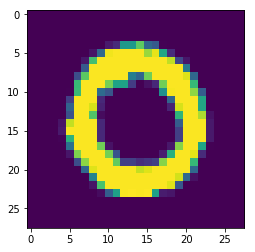

In [57]:
import matplotlib.pyplot as plt
first_digit =train_main.iloc[1].drop('label').values.reshape(28,28)
plt.imshow(first_digit)

In [58]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(train_main,test_size=0.3,random_state=100)

train_x1=train.drop('label',axis=1)
train_y1=train['label']

test_x1=test.drop('label',axis=1)
test_y1=test['label']


In [59]:
#DECISION TREE, RANDOM FOREST, KNN, ADA BOOS TOGETHER

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

l=[]
model_1=DecisionTreeClassifier(random_state=100,max_depth=3)
model_2=RandomForestClassifier(random_state=100,n_estimators=300)
model_3=KNeighborsClassifier(n_neighbors=5)
model_4=AdaBoostClassifier(random_state=100, n_estimators=800)
a=(model_1,model_2,model_3,model_4)
for i in a:
    i.fit(train_x1,train_y1)
    pred_test=i.predict(test_x1)
    a=accuracy_score(test_y1,pred_test)
    l.append(a*100)
df=(pd.DataFrame({'Accuracy':l},index=['Decision Tree','Random Forest','KNN','Ada Boost']).sort_values('Accuracy',ascending=False))
df

,Accuracy
KNN,96.412698
Random Forest,96.341270
Ada Boost,64.507937
Decision Tree,45.619048


In [14]:
test_pred = model_3.predict(test_main)
df_test_pred = pd.DataFrame(test_pred, columns=['Predicted'])
df_test_pred['ImageId'] = test_main.index + 1

In [16]:
df_test_pred[['ImageId', 'Predicted']].to_csv('submission.csv', index=False)

In [17]:
pd.read_csv('submission.csv').head()

,ImageId,Predicted
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
